# Status vazduha FUZZY

In [41]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [42]:
# meteo = "data/Stanica IPH/GDAS_2017_2019_IPH.csv"
# polutanti = "data/Stanica IPH/Polutanti_2017_2019_IPH.csv"

meteo = "data/Stanica LAZ/GDAS_2018_2019_LAZ.csv"
polutanti = "data/Stanica LAZ/Polutanti_2018_2019_IPH.csv"


g_data = pd.read_csv(meteo)
g_data = g_data.dropna()
g_data['Date']= pd.to_datetime(g_data['Date'])
g_data.t02m -= 273.15  # convert to Celsius

In [43]:
p_data = pd.read_csv(polutanti)
p_data = p_data.dropna()
p_data['Date']= pd.to_datetime(p_data['Date'])

FileNotFoundError: [Errno 2] No such file or directory: 'data/Stanica LAZ/Polutanti_2018_2019_IPH.csv'

In [24]:
m_data = pd.merge(g_data, p_data, left_on='Date', right_on='Date')
m_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5471 entries, 0 to 5470
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5471 non-null   datetime64[ns]
 1   prss    5471 non-null   float64       
 2   mslp    5471 non-null   float64       
 3   tpp6    5471 non-null   float64       
 4   umof    5471 non-null   float64       
 5   vmof    5471 non-null   float64       
 6   shif    5471 non-null   float64       
 7   dswf    5471 non-null   float64       
 8   rh2m    5471 non-null   float64       
 9   wd10m   5471 non-null   float64       
 10  ws10m   5471 non-null   float64       
 11  t02m    5471 non-null   float64       
 12  tcld    5471 non-null   float64       
 13  shgt    5471 non-null   float64       
 14  cape    5471 non-null   float64       
 15  cinh    5471 non-null   float64       
 16  lisd    5471 non-null   float64       
 17  lib4    5471 non-null   float64       
 18  pblh    

In [25]:
def kategorija(vrednost, tabela):
    for el in tabela:
        if vrednost>=el[0] and vrednost <=el[1]:
            return el[2]
    return -1
    
def status_vazduha(so2, no2, pm10):
    '''
    0 - odlican
    1 - dobar
    2 - prihvatljiv
    3 - zagadjen
    4 - jako zagadjen
    '''
    so2_tabela = [
        [0, 100, 0],
        [100.001, 200, 1],
        [200.001, 350, 2],
        [350.001, 500, 3],
        [500.001, 10000, 4]
    ]
    no2_tabela = [
        [0, 40, 0],
        [40.001, 100, 1],
        [100.001, 150, 2],
        [150.001, 400, 3],
        [400.001, 10000, 4]
    ]
    pm10_tabela = [
        [0, 20, 0],
        [20.001, 40, 1],
        [40.001, 50, 2],
        [50.001, 100, 3],
        [100.001, 10000, 4]
    ]
    pm10_tabela = [
        [0, 30, 0],
        [30.001, 50, 1],
        [50.001, 100, 2],
        [100.001, 10000, 3]
    ]  
    
    r_so2 = kategorija(so2, so2_tabela)
    r_no2 = kategorija(no2, no2_tabela)
    r_pm10 = kategorija(pm10, pm10_tabela)
    ret = np.array([r_so2, r_no2, r_pm10])
    # ret = np.array([so2, no2, pm10])
    
    return ret

In [26]:
m_data.describe().transpose()

count         mean         std     min       25%      50%       75%  \
prss   5471.0   972.796898    6.704274  945.20   968.805   972.84   977.030   
mslp   5471.0  1016.777863    7.085870  987.42  1012.410  1016.32  1020.965   
tpp6   5471.0     0.000175    0.001327    0.00     0.000     0.00     0.000   
umof   5471.0     0.005140    0.099401   -0.57    -0.030     0.00     0.040   
vmof   5471.0    -0.000349    0.115353   -0.82    -0.040     0.00     0.040   
shif   5471.0    15.991512   60.714536  -80.51   -27.625    -6.56    44.200   
dswf   5471.0   177.298591  229.346199   -3.00     0.000    56.00   324.845   
rh2m   5471.0    72.786112   16.719205   16.87    61.630    76.11    86.280   
wd10m  5471.0   200.309832   79.108950    6.42   138.265   192.48   267.745   
ws10m  5471.0     2.559766    1.261558    0.46     1.660     2.26     3.220   
t02m   5471.0    11.687097    8.877687  -14.26     4.590    12.29    18.310   
tcld   5471.0    54.789327   38.330780    0.00    13.680    61.28    94.940   
shgt   5471.0   375.744862   10.674071  357.82   357.820   382.10   382.100   
cape   5471.0   119.133471  325.498374    0.00     0.000     0.00    29.110   
cinh   5471.0   -15.129580   41.669493 -486.51    -6.905    -0.04     0.030   
lisd   5471.0   279.991539    6.914660  262.46   274.490   279.38   284.950   
lib4   5471.0     3.985538    4.928275  -10.06     0.200     3.47     7.110   
pblh   5471.0   397.231954  454.217869   -7.52    47.355   205.35   624.865   
tmps   5471.0   284.766083    9.562408  256.14   277.085   284.94   291.330   
cppa   5471.0     0.000064    0.000797    0.00     0.000     0.00     0.000   
solm   5471.0     0.038810    0.071370    0.00     0.000     0.00     0.070   
csno   5471.0     0.026321    0.160102    0.00     0.000     0.00     0.000   
cice   5471.0     0.000000    0.000000    0.00     0.000     0.00     0.000   
cfzr   5471.0     0.000183    0.013520    0.00     0.000     0.00     0.000   
crai   5471.0     0.084080    0.277533    0.00     0.000     0.00     0.000   
lcld   5471.0    25.625675   33.652842    0.00     0.000     4.69    49.035   
lhtf   5471.0    68.364456  109.332734  -14.47     3.160    15.57    75.570   
mcld   5471.0    24.384354   34.012612    0.00     0.000     1.74    45.865   
hcld   5471.0    41.065357   38.120645    0.00     0.570    32.76    79.435   
SO2    5471.0    19.174186   20.589812    0.50     6.810    12.63    23.600   
NO     5471.0    41.325509   60.036287    0.50     8.955    20.70    49.395   
NO2    5471.0    39.788976   30.933210    0.50    18.200    33.61    53.300   
NOx    5471.0   100.415546  111.483589    1.46    33.630    66.80   127.000   
PM10   5471.0    37.271042   34.368769    0.50    16.600    27.74    44.855   

           max  
prss    993.29  
mslp   1040.84  
tpp6      0.02  
umof      0.71  
vmof      1.09  
shif    321.85  
dswf    820.21  
rh2m    100.32  
wd10m   353.16  
ws10m     9.42  
t02m     34.70  
tcld    100.00  
shgt    382.10  
cape   3272.51  
cinh      0.50  
lisd    306.31  
lib4     20.69  
pblh   2924.37  
tmps    311.53  
cppa      0.01  
solm      0.27  
csno      1.00  
cice      0.00  
cfzr      1.00  
crai      1.00  
lcld    100.00  
lhtf    498.43  
mcld    100.00  
hcld    100.00  
SO2     279.75  
NO      786.11  
NO2     661.60  
NOx    1534.00  
PM10    355.00

In [27]:
# hist = m_data.PM10.hist(bins=30)

In [28]:
def create_dataset(dataset, look_back=1, step = 8):
    dataX, dataY, dataT = [], [], []
    for i in range(look_back, len(dataset), step):
        a = dataset.iloc[i-look_back:i, 1:]
        a = a.to_numpy()
        dataX.append(a)
        b = dataset.iloc[i]
        status = status_vazduha(b.SO2, b.NO2, b.PM10)
        dataT.append(dataset.iloc[i].Date)
#         if np.any(status >2):
#             print(dataset.iloc[i].Date, status)
        dataY.append(status)
    return np.array(dataX), np.array(dataY), np.array(dataT)

In [29]:
look_back = 8
ds = create_dataset(m_data, look_back, 1)
# ds_deo = create_dataset(deo, look_back, look_back)


In [30]:
# plt.figure(figsize=(20,10))
# plt.grid()
# plt.scatter(ds_deo[2], ds_deo[1][:,2])

# plt.show()

In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten

from tensorflow.keras.utils import to_categorical


# -------------------

In [32]:
# n = len(ds[0])
# n_train = int(0.8*n)
# # Load the data


# OUTPUT_FEATURE = 2

# X_train = ds[0][0:n_train,:, :]
# print(X_train.shape)




# X_train = X_train.reshape((n_train, feature_vector_length))
# Y_train = ds[1][0:n_train, OUTPUT_FEATURE]

# X_test = ds[0][n_train:,:, :]
# X_test = X_test.reshape((n-n_train, feature_vector_length))
# Y_test = ds[1][n_train:, OUTPUT_FEATURE]

# print(X_train.shape)
# print(Y_train.shape)


x = ds[0]
y = ds[1]


n = y.shape[0]

train_rank = int(0.8*n)
test_rank = int(0.2*n)

train_subset = np.random.choice(x.shape[0], train_rank)
test_subset = np.random.choice(x.shape[0], test_rank)


OUTPUT_FEATURE = 2

X_train = x[train_subset]
Y_train = y[train_subset][:, OUTPUT_FEATURE]

# test dataset
X_test = x[test_subset]
Y_test = y[test_subset][:, OUTPUT_FEATURE]

feature_vector_length = X_train.shape[1]*X_train.shape[2]# 7*34

X_train = X_train.reshape((X_train.shape[0], feature_vector_length))
X_test = X_test.reshape((X_test.shape[0], feature_vector_length))


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)


(4370, 272)
(1092, 272)
(4370,)


In [33]:
# n_timesteps, n_features = X_train.shape[1], X_train.shape[2]

# Set the input shape
input_shape = (feature_vector_length,)
num_classes = 4
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(50, input_shape=input_shape, activation='relu'))
# model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
# model.add(Dropout(0.5))
# model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.4))
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.build()
model.summary()

Feature shape: (272,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                13650     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 204       
Total params: 16,404
Trainable params: 16,404
Non-trainable params: 0
_________________________________________________________________


In [34]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)


X_train = tf.keras.utils.normalize(X_train, axis=-1, order=1)
X_test = tf.keras.utils.normalize(X_test, axis=-1, order=1)


Y_train = to_categorical(Y_train, num_classes=num_classes)
Y_test = to_categorical(Y_test, num_classes=num_classes)
print(Y_train[0])


Y_train = tf.convert_to_tensor(Y_train, dtype=tf.float32)
Y_test = tf.convert_to_tensor(Y_test, dtype=tf.float32)


[0. 1. 0. 0.]


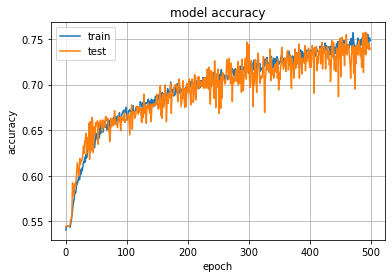

In [35]:
for i in range(1):
    # Configure the model and start training
    
#     model.compile(
#         optimizer= tf.keras.optimizers.RMSprop(),  # Optimizer
#         loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#         metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
#     )    
        
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    history = model.fit(X_train, Y_train, epochs=500, batch_size=100, verbose=0, 
                validation_data=(X_test, Y_test))

    # summarize history for accuracy
    plt.grid()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [36]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

35/35 [==============================] - 0s 731us/step - loss: 0.6574 - accuracy: 0.7399
Test results - Loss: 0.6573721170425415 - Accuracy: 0.7399267554283142%


In [37]:

pY = model.predict(X_test)

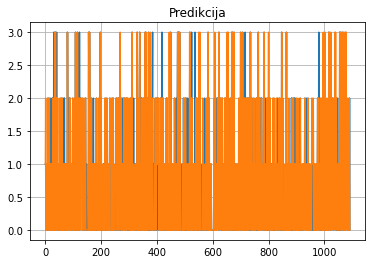

In [38]:
plt.grid()
plt.plot(np.argmax(Y_test, axis=1))
plt.plot(np.argmax(pY, axis=1))
plt.title('Predikcija')
plt.show()

In [39]:
# for y, py in zip(Y_test[:100], pY):
#     print(np.argmax(y), np.argmax(py))


In [40]:
from sklearn.metrics import confusion_matrix
y_true = np.argmax(Y_test, axis=1)
y_pred = np.argmax(pY, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[504  77  13   1]
 [ 83 163  42   4]
 [  8  31 103  15]
 [  1   2   7  38]]
